# Tutorial 3: Building a circular machine.

# Objectives:
#### - Build a circular machine by introducing dipoles into the FODO cell of Tutorial 1.
#### - Use the MATCHING MAD-X engine to compute the strength of the magnets to get a desired tune.


# Questions

#### 1. Consider now the FODO cell of Tutorial 1 and add 4 sector dipoles of 15 m long (assume 5 m of drift space between magnets). Consider a ring with 736 dipoles with equal bending angles.


  <div>
  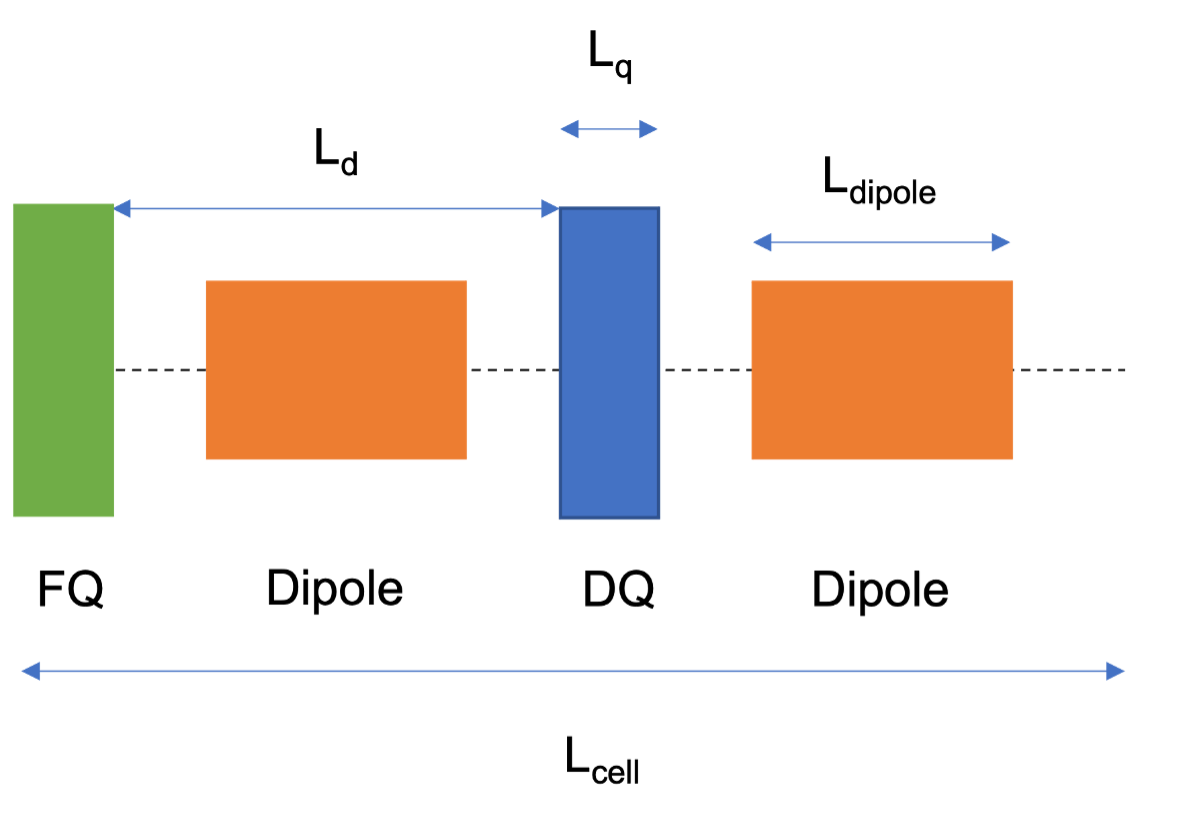
  </div>
  
#### 2. Do the dipoles (weak focusing) affect the 𝛽𝑚𝑎𝑥 and the dispersion? Compute the relative variation on the 𝛽𝑚𝑎𝑥 on the two planes.
#### 3. From the phase advance of the FODO cell compute the horizontal and vertical tune of the machine?
#### 4. Supose you want to set a tune (60.2, 67.2), use the MAD-X matching routine on a single FODO to get it.

#### **BONUS**
#### 5. Change the beam to $E_{tot}= 7 TeV$. What is the new tune of the machine? Why?
#### 6. What is the maximum tune that you can reach with such a lattice? (HINT: what is the maximum phase advance per FODO cell in the thin lens approximation...)

# Python libraries 

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

# Python plot commands

#### You can copy/paste, uncomment and apply the example below for plotting:

In [2]:
###########################
#### Plot example code ####
###########################

#### To change the size of the plot window
# plt.rcParams['figure.dpi'] = 100

#### Plot command
# plt.plot(x,y,'ob',label='Example')

#### Adding labels
# plt.xlabel('s[m]')
# plt.ylabel('[m]')

#### Adding a legend
# plt.legend(loc='best')

# Launching MAD-X

In [3]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.06 16:31:11      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Methods in the Madx class from cpymad library to be used:

#### To run the MAD-X lattice input file:

`madx.call('name_of_the_file.madx')`

#### To save the MAD-X output data from the TWISS and SUMM tables into a pandas dataframe: 

`madx.table.twiss.dframe()`

`madx.table.summ.dframe()`

#### To run a MAD-X command from the Jupyter-notebook: 

`madx.input("MAD-X command")`

# Solutions

#### 1. Consider now the FODO cell of Tutorial 1 and add 4 sector dipoles of 15 m long (assume 5 m of drift space between magnets). Consider a ring with 736 dipoles with equal bending angles.

  <div>
  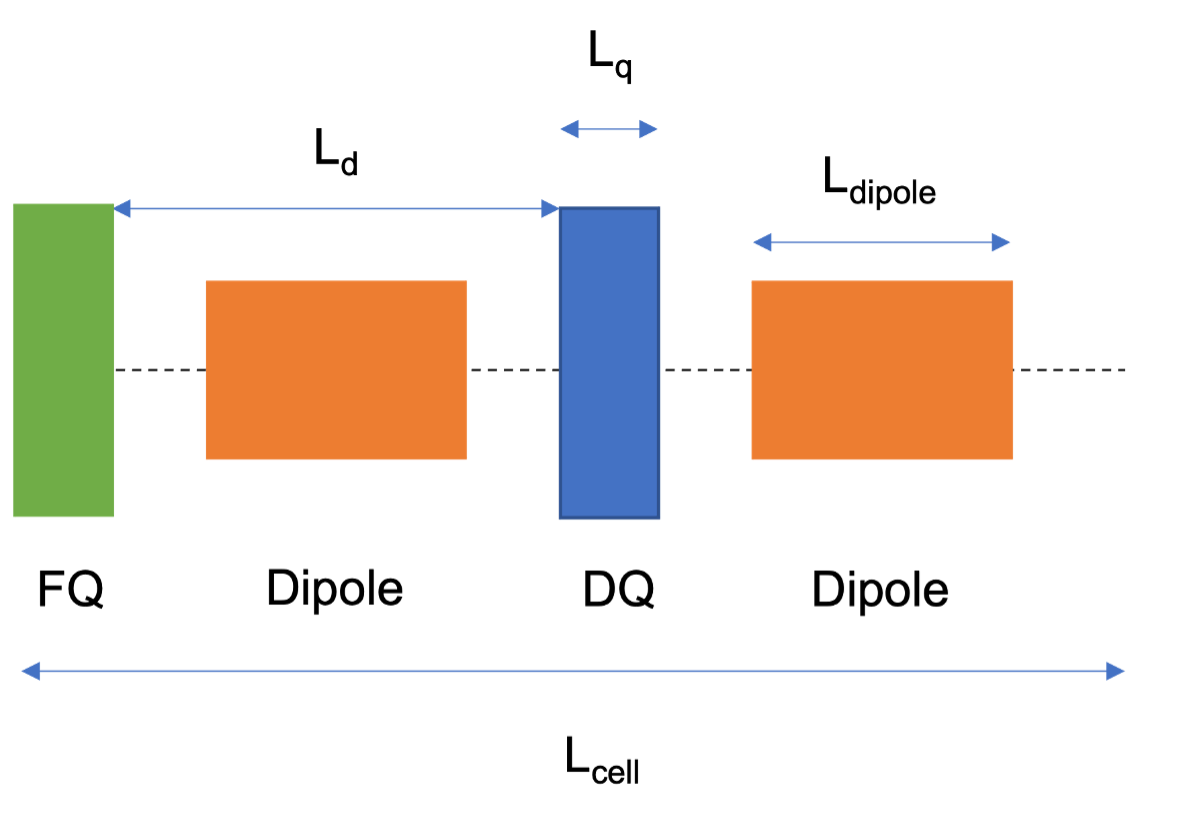
  </div>

        Define the dipole parameters:
        BM: sbend, L=??, angle:=??;
    
        Add the dipole in the sequence: 
        dipole1: BM, at=??;

#### First, the calculation of the required bending angle for a circular orbit:

#### $2*\pi=N\theta$

In [4]:
madx.call('Tutorial3_solution.madx')

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupoleLenght=5;

dipoleLength=15;



nBend=736;

myAngle=2*pi/nBend;



myKF=0.0056;// m^-2

myKD=0.0056;// m^-2



! *********************************************************************

! Definition of magnets

! ********************************************************************* 

QF: quadrupole, L=quadrupoleLenght, K1:=myKF;

QD: quadrupole, L=quadrupoleLenght, K1:=-myKD;

BM: sbend, L=dipoleLength, angle:=myAngle; 



! *********************************************************************

! Definition of sequence

! *********************************************************************

myCell:sequence, refer=entry, L=l_cell;

q1: QF, at=0;

B1: BM, at =5+quadrupoleLength/2, from=q1; ! This from  is w.r.t. the center of the element.

B2: BM, at =5+dipoleLength/2, from=B1;

q2: QD, at=l_ce

In [5]:
myString='''
! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
twiss, file=MyfirstFODOwithDipoles.madx;
'''

madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0006059118346        40.62517852 

                q1                dq1            betxmax              dxmax 
      0.2365010524      -0.3303724261        160.5481671         2.77093532 

             dxrms             xcomax             xcorms                 q2 
       2.214474149                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
      -0.330482138        160.6036546                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

In [6]:
#Saving the content of the TWISS and SUMM table in two panda dataframes names as first_twiss and first_summary
first_twiss_with_dipoles=madx.table.twiss.dframe()
first_summary_with_dipoles=madx.table.summ.dframe()

In [7]:
first_twiss_with_dipoles[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,160.547350,-2.259127,0.000000,34.217492,0.548735,0.000000,2.770935,0.0,0.038252,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,160.548167,2.258972,0.004843,34.217492,-0.548735,0.023892,2.766052,0.0,-0.040183,0.0
drift_0[0],drift_0:0,drift,7.5,0.0,0.0,0.0,0.0,149.490892,2.163939,0.007411,37.198821,-0.643797,0.035054,2.665595,0.0,-0.040183,0.0
b1,b1:1,sbend,22.5,0.0,0.0,0.0,0.0,93.117762,1.594179,0.027700,65.068278,-1.214167,0.084364,2.135263,0.0,-0.030528,0.0
drift_1[0],drift_1:0,drift,27.5,0.0,0.0,0.0,0.0,78.126761,1.404021,0.037035,78.160567,-1.404291,0.095532,1.982624,0.0,-0.030528,0.0
b2,b2:1,sbend,42.5,0.0,0.0,0.0,0.0,44.559345,0.833752,0.077945,128.844846,-1.974661,0.119411,1.597142,0.0,-0.020870,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,34.192949,0.548434,0.108717,160.603655,-2.259847,0.127712,1.440620,0.0,-0.020870,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,34.193106,-0.548467,0.132627,160.603655,2.259847,0.132553,1.435845,0.0,0.018938,0.0
drift_3[0],drift_3:0,drift,57.5,0.0,0.0,0.0,0.0,37.173213,-0.643575,0.143796,149.542076,2.164785,0.135121,1.483189,0.0,0.018938,0.0
b3,b3:1,sbend,72.5,0.0,0.0,0.0,0.0,65.036343,-1.213922,0.193135,93.154092,1.594414,0.155402,1.839695,0.0,0.028596,0.0


In [8]:
first_summary_with_dipoles

,length,orbit5,alfa,gammatr,q1,dq1,betxmax,dxmax,dxrms,xcomax,...,ycorms,deltap,synch_1,synch_2,synch_3,synch_4,synch_5,synch_6,synch_8,nflips
#e,100.0,-0.0,0.000606,40.625179,0.236501,-0.330372,160.548167,2.770935,2.214474,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PLOT

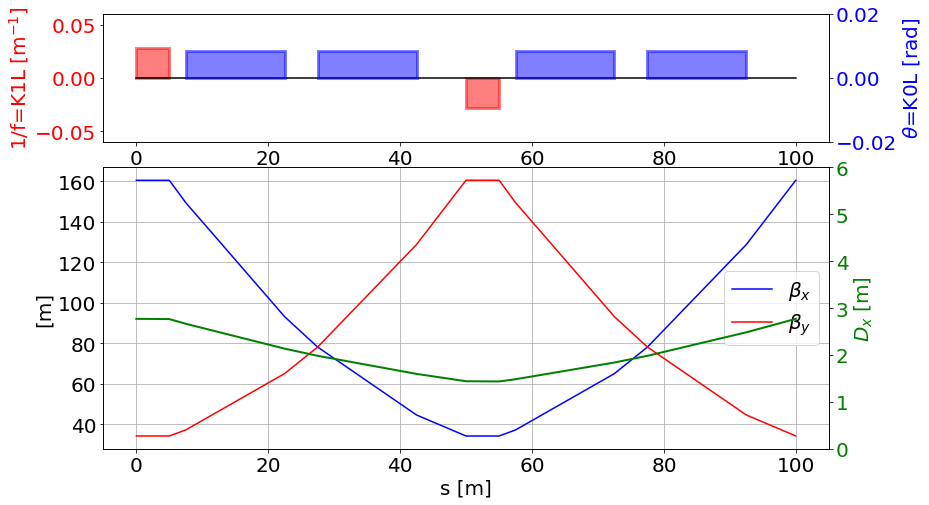

In [9]:
import sys
sys.path.append('../')
import lib_JUAS2023 as lib
lib.plot_layout(first_twiss_with_dipoles)

#### 2. Do the dipoles (weak focusing) affect the 𝛽𝑚𝑎𝑥 and the dispersion? Compute the relative variation on the 𝛽𝑚𝑎𝑥 on the two planes.

In [10]:
myString='''
myAngle=0;
use,sequence=myCell;      
twiss;
'''
madx.input(myString);

++++++ info: myangle redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 


In [11]:
#Saving the content of the TWISS and SUMM table in two panda dataframes names as second_twiss and second_summary
first_twiss_without_dipoles=madx.table.twiss.dframe()
first_summary_without_dipoles=madx.table.summ.dframe()

In [12]:
first_twiss_without_dipoles[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,160.603655,-2.259847,0.000000,34.217492,0.548735,0.000000,0.0,-0.0,-0.0,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,160.603655,2.259847,0.004841,34.217492,-0.548735,0.023892,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,7.5,0.0,0.0,0.0,0.0,149.542076,2.164785,0.007408,37.198821,-0.643797,0.035054,0.0,0.0,0.0,0.0
b1,b1:1,sbend,22.5,0.0,0.0,0.0,0.0,93.154092,1.594414,0.027690,65.068278,-1.214167,0.084364,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,27.5,0.0,0.0,0.0,0.0,78.160567,1.404291,0.037021,78.160567,-1.404291,0.095532,0.0,0.0,0.0,0.0
b2,b2:1,sbend,42.5,0.0,0.0,0.0,0.0,44.587405,0.833920,0.077910,128.844846,-1.974661,0.119411,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,34.217492,0.548735,0.108661,160.603655,-2.259847,0.127712,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,34.217492,-0.548735,0.132553,160.603655,2.259847,0.132553,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,57.5,0.0,0.0,0.0,0.0,37.198821,-0.643797,0.143715,149.542076,2.164785,0.135121,0.0,0.0,0.0,0.0
b3,b3:1,sbend,72.5,0.0,0.0,0.0,0.0,65.068278,-1.214167,0.193024,93.154092,1.594414,0.155402,0.0,0.0,0.0,0.0


In [13]:
comparison=pd.DataFrame({'With dipoles':first_twiss_with_dipoles.max(),'Without dipoles':first_twiss_without_dipoles.max()})
comparison.loc[['betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
        ]]

,With dipoles,Without dipoles
betx,160.548167,160.603655
alfx,2.258972,2.259847
mux,0.236501,0.236373
bety,160.603655,160.603655
alfy,2.259847,2.259847
muy,0.236373,0.236373
dx,2.770935,0.0
dy,0.0,0.0
dpx,0.038252,0.0
dpy,0.0,0.0


In [14]:
#Relative variation [%]
betx_rel=(np.max(first_twiss_without_dipoles.betx)-np.max(first_twiss_with_dipoles.betx))/np.max(first_twiss_without_dipoles.betx)
print(betx_rel*100)

bety_rel=(np.max(first_twiss_without_dipoles.bety)-np.max(first_twiss_with_dipoles.bety))/np.max(first_twiss_without_dipoles.bety)
print(bety_rel*100)

0.03454930943203526
0.0


In [15]:
#########################################
# What is the impact on the beam size? #
#########################################

# First we compute the beam size for each case
emittance_n=3e-6 #m*rad
beta_gamma=7000/.938 # this is an approximation

sigma_no_dipoles=np.sqrt(np.max(first_twiss_without_dipoles.betx)*emittance_n/beta_gamma)
print(sigma_no_dipoles)

sigma_with_dipoles=np.sqrt(np.max(first_twiss_with_dipoles.betx)*emittance_n/beta_gamma)
print(sigma_with_dipoles)

0.0002540918517774359
0.0002540479544955003


In [16]:
#Relative variation [%]
betx_rel=(sigma_no_dipoles-sigma_with_dipoles)/sigma_no_dipoles
print(betx_rel*100)

0.017276147042300325


#### 3. From the phase advance of the FODO cell compute the horizontal and vertical tune of the machine?

In [17]:
# First we need to compute the total number of FODO cells needed 
Ncells=736/4 
Ncells

184.0

In [18]:
#The machine tunes are therefore
display(Ncells*first_twiss_with_dipoles['mux'].max())
display(Ncells*first_twiss_with_dipoles['muy'].max())

43.51619365049638

43.49260436271754

#### 4. Supose you want to set a tune (60.2, 67.2), use the MAD-X matching routine on a single FODO to get it. 
     
        MATCH, SEQUENCE=myCell;
        GLOBAL, Q1=??;//H-tune
        GLOBAL, Q2=??;//V-tune
        VARY, NAME= ??, STEP=0.00001;
        VARY, NAME= ??, STEP=0.00001;
        LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
        ENDMATCH;



In [19]:
#Remeber that we have computed the total number of cells in the machine
Ncells=736/4 
print(Ncells)

184.0


In [20]:
#What is the phase advance per cell we want to match to?
np.array([60.2, 67.2])/Ncells

array([0.32717391, 0.36521739])

In [21]:
myString='''

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="BeforeMatching.txt";

! *********************************************************************
! MATCHING
! *********************************************************************

phaseWantedX=60.2/(736/4);
phaseWantedY=67.2/(736/4);

MATCH, SEQUENCE=myCell;
GLOBAL, Q1=phaseWantedX;//H-tune
GLOBAL, Q2=phaseWantedY;//V-tune
VARY, NAME= myKF, STEP=0.00001;
VARY, NAME= myKD, STEP=0.00001;
LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
ENDMATCH;

! *********************************************************************
! TWISS AFTER MATCHING
! *********************************************************************

twiss,table=aftermatching, file="AfterMatching.txt";

! *********************************************************************
! FINAL TUNE VALUES
! *********************************************************************

value, table(summ,Q1)*(736/4);
value, table(summ,Q2)*(736/4);

'''
madx.input(myString);

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

In [22]:
#Saving the content of the TWISS and SUMM table in two panda dataframes names as first_twiss and first_summary
twiss_after_matching=madx.table['aftermatching'].dframe()
summary_after_matching=madx.table['summ'].dframe()

In [23]:
twiss_after_matching[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,203.677133,-3.671600,0.000000,13.355691,0.435019,0.000000,0.0,-0.0,-0.0,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,203.677133,3.671600,0.003792,13.355691,-0.435019,0.063001,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,7.5,0.0,0.0,0.0,0.0,185.763482,3.493860,0.005838,16.087310,-0.657629,0.090279,0.0,0.0,0.0,0.0
b1,b1:1,sbend,22.5,0.0,0.0,0.0,0.0,96.944303,2.427419,0.023665,55.851030,-1.993286,0.173689,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,27.5,0.0,0.0,0.0,0.0,74.447519,2.071938,0.033038,78.009985,-2.438505,0.185757,0.0,0.0,0.0,0.0
b2,b2:1,sbend,42.5,0.0,0.0,0.0,0.0,28.285995,1.005497,0.086035,171.199995,-3.774162,0.206473,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,17.202699,0.472276,0.141248,232.821144,-4.441991,0.212453,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,17.202699,-0.472276,0.189718,232.821144,4.441991,0.215765,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,57.5,0.0,0.0,0.0,0.0,20.008430,-0.650016,0.211230,211.167713,4.219381,0.217560,0.0,0.0,0.0,0.0
b3,b3:1,sbend,72.5,0.0,0.0,0.0,0.0,55.505540,-1.716458,0.285537,104.621131,2.883724,0.233649,0.0,0.0,0.0,0.0


#### 5. Change the beam to $E_{tot}= 7 TeV$. What is the new tune of the machine? Why?

In [24]:
myString='''

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=7000;

! *********************************************************************
! TWISS
! *********************************************************************
twiss, sequence=myCell;

'''
madx.input(myString);

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ


               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.3271739212      -0.5458749642        203.6771327                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.3652175262 

               dq2            betymax              dymax              dyrms 
     -0.6840946148        232.8211439                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0           

In [25]:
#Saving the content of the TWISS and SUMM table in two panda dataframes names as second_twiss and second_summary
twiss_after_matching_7TeV=madx.table['twiss'].dframe()
summary_after_matching_7TeV=madx.table['summ'].dframe()

In [26]:
twiss_after_matching_7TeV[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,203.677133,-3.671600,0.000000,13.355691,0.435019,0.000000,0.0,-0.0,-0.0,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,203.677133,3.671600,0.003792,13.355691,-0.435019,0.063001,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,7.5,0.0,0.0,0.0,0.0,185.763482,3.493860,0.005838,16.087310,-0.657629,0.090279,0.0,0.0,0.0,0.0
b1,b1:1,sbend,22.5,0.0,0.0,0.0,0.0,96.944303,2.427419,0.023665,55.851030,-1.993286,0.173689,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,27.5,0.0,0.0,0.0,0.0,74.447519,2.071938,0.033038,78.009985,-2.438505,0.185757,0.0,0.0,0.0,0.0
b2,b2:1,sbend,42.5,0.0,0.0,0.0,0.0,28.285995,1.005497,0.086035,171.199995,-3.774162,0.206473,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,17.202699,0.472276,0.141248,232.821144,-4.441991,0.212453,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,17.202699,-0.472276,0.189718,232.821144,4.441991,0.215765,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,57.5,0.0,0.0,0.0,0.0,20.008430,-0.650016,0.211230,211.167713,4.219381,0.217560,0.0,0.0,0.0,0.0
b3,b3:1,sbend,72.5,0.0,0.0,0.0,0.0,55.505540,-1.716458,0.285537,104.621131,2.883724,0.233649,0.0,0.0,0.0,0.0


In [27]:
# Machine tunes at 2 GeV after the matching
display(Ncells*twiss_after_matching['mux'].max())
display(Ncells*twiss_after_matching['muy'].max())

60.20000149222179

67.20002482229044

In [28]:
# Machine tunes at 7000 GeV after the matching
display(Ncells*twiss_after_matching_7TeV['mux'].max())
display(Ncells*twiss_after_matching_7TeV['muy'].max())

60.20000149222179

67.20002482229044

#### **Conclusion**: since the K1 is normalized to the beam rigidity, the beam energy has no impact on the beta fuctions and on the phase advance, therefore the tunes are the same. However, watch out the definition of the chromaticity (DQ1 and DQ2) and all the momentum derivative quantities in MAD-X which are normalised to the beta relativistic factor.

#### **Rememeber the concept of chromaticity**

<div>
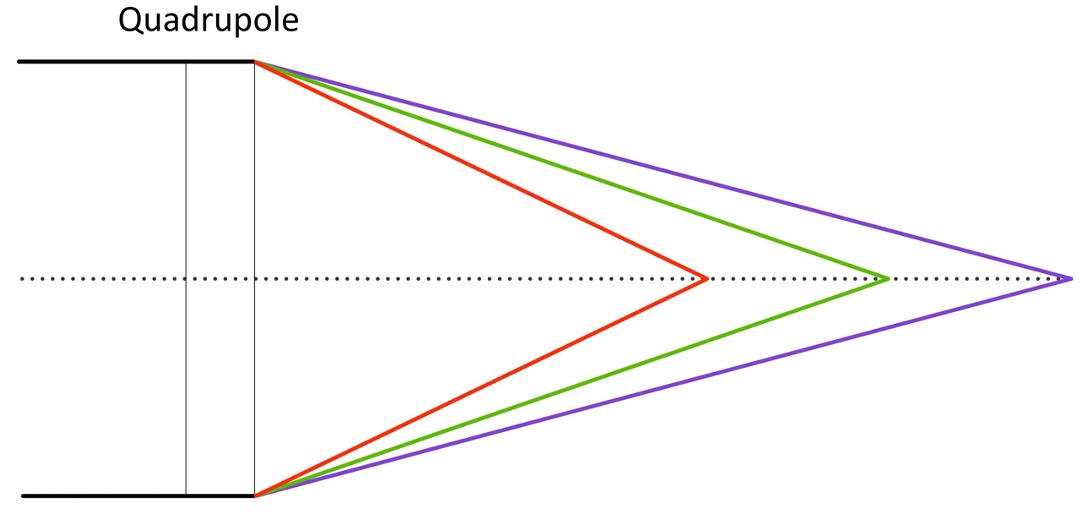
</div>

In [29]:
# Machine chromaticity at 2 GeV
display(summary_after_matching.iloc[0][['dq1','dq2']])

dq1   -0.618117
dq2   -0.774629
Name: #e, dtype: float64

In [30]:
# Machine chromaticity at 7000 GeV
display(summary_after_matching_7TeV.iloc[0][['dq1','dq2']])

dq1   -0.545875
dq2   -0.684095
Name: #e, dtype: float64

In [31]:
# Whatch out the importance of the relativistic beta factor for the chromaticity!
# Compute the beta relativistic factor
import numpy as np
beta_r3=np.sqrt(1-(2/madx.globals['pmass'])**(-2))
print("Relativistic factor beta for 2 GeV")
print(beta_r3)
display(summary_after_matching.iloc[0][['dq1','dq2']]*beta_r3)

beta_r1=np.sqrt(1-(7000/madx.globals['pmass'])**(-2))
print("Relativistic factor beta for 7000 GeV")
print(beta_r1)
display(summary_after_matching_7TeV.iloc[0][['dq1','dq2']]*beta_r1)

Relativistic factor beta for 2 GeV
0.8831259095649772


dq1   -0.545875
dq2   -0.684095
Name: #e, dtype: float64

Relativistic factor beta for 7000 GeV
0.9999999910167907


dq1   -0.545875
dq2   -0.684095
Name: #e, dtype: float64

#### In MAD-X the chromaticity and second momentum derivatives are normalized by the relativistic factor $\beta$ in order to make possible the computation of transport maps accounting for second order aberrations. To obtain the values from textbooks one needs to multiply the MAD-X values by the the relativistic factor $\beta$.

#### 6. What is the maximum tune that you can reach with such a lattice? (HINT: what is the maximum phase advance per FODO cell in the thin lens approximation...)

#### The maximum phase advance for FODO cell is 180 degrees (rememeber Figure 1 from Tutorial 2). In units of 2$\pi$ this corresponds to 0.5 and then the maximum tune of the full machine will be:

In [32]:
#Max. tune of the mchine in units of 2pi
Ncells*.5

92.0